In [1]:
from analysis import image2stack
from in_out import crop_save
from glob import glob
from tifffile import imwrite
from tqdm import tqdm
from visualization import show_one_image

import matplotlib.pyplot as plt
import numpy as np
import os
import tifffile as tiff
import PIL

In [2]:
# root_path = '/home/wrx/Data_WF/WF_WRX/'
root_path = '/home/wrx/Data_DOM/Widefield'

mouse_id = 'X2'
date = '20250416'
treatment = 'DOM'

treatment_folder = os.path.join(root_path, mouse_id, date, treatment)
print(treatment_folder)

/home/wrx/Data_DOM/Widefield/X2/20250416/DOM


In [3]:
# Reading the images
chan1_folder_ls = glob(os.path.join(treatment_folder, '*-470'))
chan2_folder_ls = glob(os.path.join(treatment_folder, '*-405'))
print(chan1_folder_ls)
print(chan2_folder_ls)

['/home/wrx/Data_DOM/Widefield/X2/20250416/DOM/20250416-152529-470']
['/home/wrx/Data_DOM/Widefield/X2/20250416/DOM/20250416-152529-405']


Crop parameter setting

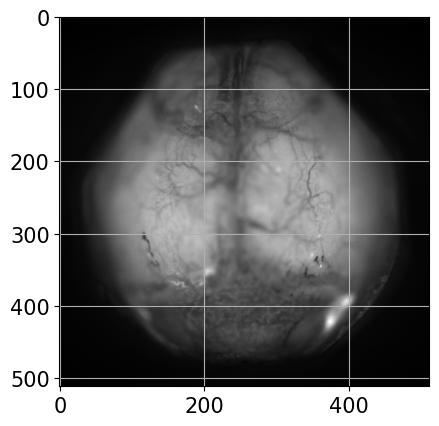

In [4]:
ref_image_path = os.path.join(chan1_folder_ls[0], '1.tif')
ref_image = plt.imread(ref_image_path)
show_one_image(ref_image)

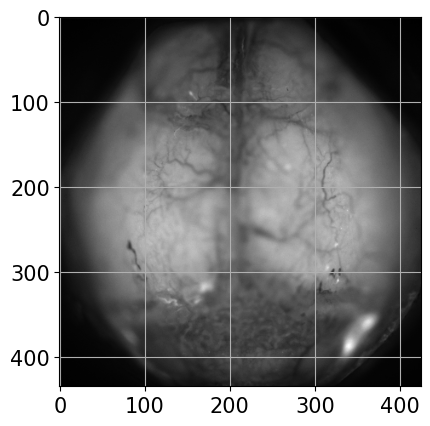

In [7]:
top, left, bottom, right = 35, 35, 470, 460
ref_image_crop = ref_image[top:bottom, left:right]
show_one_image(ref_image_crop)


In [8]:
im = PIL.Image.fromarray(ref_image_crop)
# do not save as tif, will error at TiffStack.export_binary otherwize
im.save(os.path.join(treatment_folder, 'reference.png'))

Save the parameter

In [9]:
parameters_path = os.path.join(treatment_folder, 'parameters.npy')
if os.path.exists(parameters_path):
    print('The parameters file exists')
    parameters = np.load(parameters_path, allow_pickle=True).item()
else:
    print('The parameters file does not exist')
    parameters = {}

parameters['crop'] = (top, left, bottom, right)
np.save(parameters_path, parameters)

The parameters file does not exist


Save the corpped image as tiff file

In [10]:
n_preview = 1000
crop_save(treatment_folder, parameters=(top, left, bottom, right),
    n_preview=None)

/home/wrx/.conda/envs/wfield/lib/python3.11/site-packages/tifffile/tifffile.py:1569: UserWarning: <tifffile.TiffWriter 'merged.tif'> writing nonconformant BigTIFF ImageJ
  warnings.warn(


36000


100%|██████████| 36000/36000 [07:12<00:00, 83.20it/s] 
